In [1]:
import geopandas as gpd
from shapely.ops import triangulate
import meshio

# Define the path to the shapefile
shapefile_path = './cb_2018_us_nation_20m/cb_2018_us_nation_20m.shp'

# Load the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)

triangulated_mesh = []
print(gdf)
i=0
j=0
for geometry in gdf.geometry:
   if geometry.geom_type == 'Polygon':
      print("GOT A POLYGON", i, j)
      triangles = triangulate(geometry)
      triangulated_mesh.extend(triangles)
   elif geometry.geom_type == 'MultiPolygon':
      print("Got a MultiPolygon", i, j)
      for polygon in geometry.geoms:  # Iterate over the individual polygons
         print(polygon , "Got inside the MultiPolygon loop", i, j)         
         triangles = triangulate(polygon)
         triangulated_mesh.extend(triangles)
         j=j+1
   i=i+1

# Create a new GeoDataFrame from the triangulated mesh
triangulated_gdf = gpd.GeoDataFrame(geometry=triangulated_mesh)
# print(triangulated_gdf)
# Save the triangulated mesh as a UGRID file
# output_path = './triangulated_mesh.ugrid'
print(triangulated_mesh)


    AFFGEOID GEOID           NAME  \
0  0100000US    US  United States   

                                            geometry  
0  MULTIPOLYGON (((179.48132 51.97530, 179.58286 ...  
Got a MultiPolygon 0 0
POLYGON ((179.481318 51.975300999999995, 179.582857 52.016841, 179.636846 52.025712, 179.773922 51.970693, 179.743012 51.911749, 179.649484 51.87367, 179.543516 51.890926, 179.484634 51.921268, 179.481318 51.975300999999995)) Got inside the MultiPolygon loop 0 0
POLYGON ((178.600493 51.655255999999994, 178.66060000000002 51.683065, 178.92533 51.623903999999996, 179.195247 51.477871, 179.295785 51.419232, 179.41824 51.416194999999995, 179.480418 51.363859999999995, 179.25327099999998 51.337239, 179.031533 51.449884, 178.930219 51.530089, 178.869249 51.556985999999995, 178.7724 51.554119, 178.60486600000002 51.616015, 178.600493 51.655255999999994)) Got inside the MultiPolygon loop 0 1
POLYGON ((178.46338500000002 51.987849, 178.552612 51.973968, 178.59159699999998 51.952652, 178.539

Text(0.5, 1.0, 'Original Shapefile')

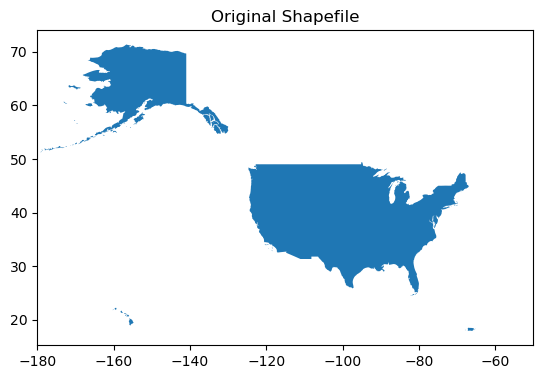

In [2]:
xmin, xmax = -180, -50

# Plot the shapefile
ax = gdf.plot()
ax.set_xlim(xmin, xmax)  # Use matplotlib's axis methods for more control
ax.set_title("Original Shapefile")

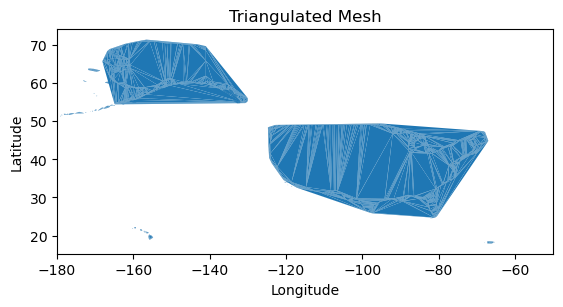

In [3]:
import matplotlib.pyplot as plt

# Plot the triangulated mesh
triangulated_gdf.plot()

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulated Mesh')
# Set the x-axis range
x_min, x_max = -180, -50
plt.xlim(x_min, x_max) 

# Show the plot
plt.show()


In [4]:
# import matplotlib.pyplot as plt

# # Plot the triangulated mesh
# triangulated_gdf.plot()

# # Add labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Triangulated Mesh')

# # Set the x-axis range
# plt.xlim(x_min, x_max)  # Replace x_min and x_max with the desired range

# # Show the plot
# plt.show()


In [ ]:
# shapefiles have two coordinate systems: geographic and projected

# Geographic Coordinate System (GCS): Uses spherical coordinates like latitude and longitude (degrees), typically ranging from -180° to 180° (longitude) and -90° to 90° (latitude).
# Projected Coordinate System (PCS): Uses flat, Cartesian coordinates like meters or feet. These are derived from GCS by applying a map projection to account for the Earth's curvature.
# NOTE: for the initial implementation, we will use the GCS and not read the .prj file

i=0
j=0
print("HERE")
import PythonCDT as cdt

def save_triangulation_as_off(t: cdt.Triangulation, off_file) -> None:
    with open(off_file, "w") as f:
        f.write(f"OFF\n")
        f.write(f"{t.vertices_count()} {t.triangles_count()} 0\n")
        for v in t.vertices_iter():
            f.write(f"{v.x} {v.y} 0\n")
        for tri in t.triangles_iter():
            vv = tri.vertices
            f.write(f"3 {int(vv[0])} {int(vv[1])} {int(vv[2])}\n")

t = cdt.Triangulation(cdt.VertexInsertionOrder.AS_PROVIDED, cdt.IntersectingConstraintEdges.IGNORE, 0.0)

first = [0.0,0.0]
print("Entering the loop")
for geometry in gdf.geometry:
   if geometry.geom_type == 'Polygon':
      print("GOT A POLYGON", i, j)
      # triangles = triangulate(geometry)
      # triangulated_mesh.extend(triangles)
   elif geometry.geom_type == 'MultiPolygon':
      print("Got a MultiPolygon", i, j)
      for polygon in geometry.geoms:  # Iterate over the individual polygons
         # if j == 3:
         #    print(polygon , "Got inside the MultiPolygon loop", i, j) 
         jj=0 
         count=0
         t = cdt.Triangulation(cdt.VertexInsertionOrder.AS_PROVIDED, cdt.IntersectingConstraintEdges.IGNORE, 0.0)

         vv = [cdt.V2d(coords[0], coords[1]) for coords in polygon.exterior.coords]
         ee = [cdt.Edge(i, i+1) for i in range(len(vv)-1)]
         # print(vv, type(vv))
         t.insert_vertices(vv)
         t.insert_edges(ee)
         # t.conform_to_edges(ee)

         file_name = "test"+str(j)+".off"
         save_triangulation_as_off(t, file_name)
         print("Saved file", file_name)
         
         
         # print(t.vertices, "number of vertices")
         print(len(t.vertices))
         for ii in list(polygon.exterior.coords):
            
            if jj == 0:
               first[0] = ii[0]
               first[1] = ii[1]
            
            if jj > 0:
               if ii[0] == first[0] and ii[1] == first[1]:
                  count+=1
                  if count > 1:
                     print("FOUND A HOLE MATCH", ii)
               # else:
                  # print("NO MATCH", ii, first)
            jj+=1
         
         # print(j, "HAS ", jj, "POINTS")
               
         # triangles = triangulate(polygon)
         # triangulated_mesh.extend(triangles)
         j=j+1
   i=i+1

In [5]:
ls -ltrh *.off

zsh:1: no matches found: *.off


In [6]:
import glob
import os
# Find all files with the name test*.off
files = glob.glob('test*.off')

# Sort the files by size
files.sort(key=lambda f: os.path.getsize(f))

# Print the sorted files
for file in files:
   print(file)


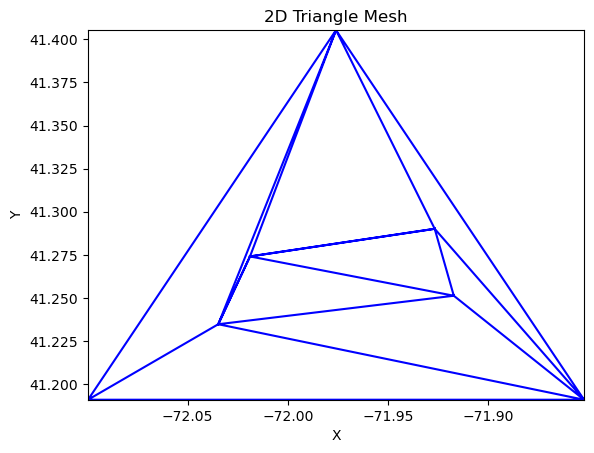

In [12]:
import numpy as np
# import trimesh

# # Load the mesh from the file
# mesh = trimesh.load_mesh('test11.off')

# print(mesh)

import matplotlib.pyplot as plt
# Load the mesh from the file
vertices = []
triangles = []

with open('test17.off', 'r') as f:
    lines = f.readlines()
    num_vertices, num_triangles, _ = map(int, lines[1].split())
    
    for line in lines[2:num_vertices+2]:
        x, y, _ = map(float, line.split())
        vertices.append([x, y])
    
    for line in lines[num_vertices+2:]:
        _, v1, v2, v3 = map(int, line.split())
        triangles.append([v1, v2, v3])

# Convert the vertices and triangles to numpy arrays
vertices = np.array(vertices)
triangles = np.array(triangles)

# Plot the mesh
fig, ax = plt.subplots()
ax.triplot(vertices[:, 0], vertices[:, 1], triangles=triangles, color='blue')

# Set the x-axis and y-axis limits
ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Triangle Mesh')

# Show the plot
plt.show()
